<a href="https://colab.research.google.com/github/Nongju-3000/Cantect/blob/master/%EA%B3%A0%EB%A1%9C%EA%B3%A0%EB%A1%9C%EB%82%98%EB%82%98%EB%82%98%EB%82%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    deathCnt   stateDt  daily_deathCnt
11     12428  20220320             NaN
10     12757  20220321           329.0
9      13141  20220322           384.0
8      13432  20220323           291.0
7      13901  20220324           469.0
6      14294  20220325           393.0
5      14617  20220326           323.0
4      14899  20220327           282.0
3      15186  20220328           287.0
2      15423  20220329           237.0
1      15855  20220330           432.0
0      16230  20220331           375.0


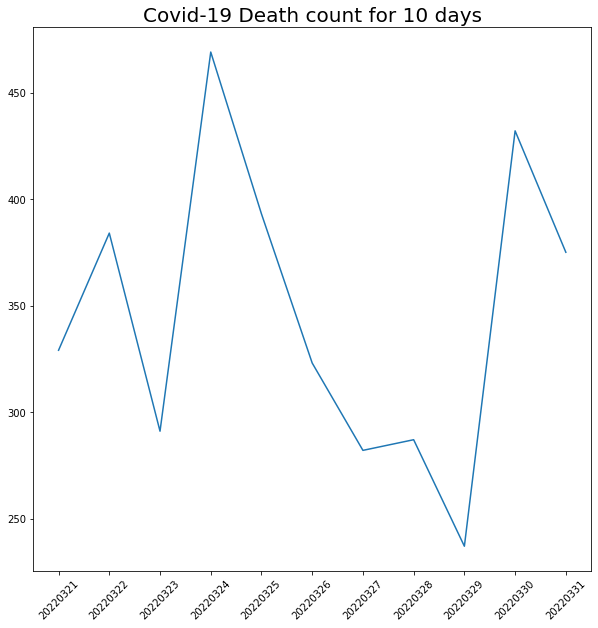

In [ ]:
from urllib import request
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import pandas as pd
import xmltodict
import json
import matplotlib.pyplot as plt

key='DExskK1KuG1HaGdcX92aGiqWel8AF5FIT3Gwk72r2Q4HiOfZQ6wN4RVKYCcJL4z1Q80gCN7S%2BqQa36gutk7Gww%3D%3D' ## open api key(비밀번호 같은거)
url = f'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey={key}&' ## api 주소
queryParams = urlencode({ quote_plus('pageNo') : 1, # 페이지 번호
                          quote_plus('numOfRows') : 1000, # 열 개수
                          quote_plus('startCreateDt') : '20220320', # 시작 일자
                          quote_plus('endCreateDt') : '20220331'})  # 완료 일자
url2 = url + queryParams
response = urlopen(url2)
results = response.read().decode("utf-8")
results_to_json = xmltodict.parse(results)
data = json.loads(json.dumps(results_to_json))
   
df = pd.DataFrame(data['response']['body']['items']['item'])
df = df.astype({'deathCnt' : 'int'}) ## deathCnt 열의 자료형 명시
df2 = df[['deathCnt','stateDt']] ## deathCnt와 stateDt 항목만 추출
df2 = df2.sort_values(by = 'stateDt') ## 날짜 기준으로 오름차순 정렬
df2['daily_deathCnt'] = df2['deathCnt'].diff() ## 누적합인 deathCnt를 일일 사망자 수로 변환
print(df2) ## 출력

fig = plt.figure(figsize = (10,10)) ## 그래프를 그릴 캔버스 생성
fig.set_facecolor('white')  ## 캔버스 색상(배경색) 설정
ax = fig.add_subplot()  ## 그림 뼈대 생성

ax.plot(df2['stateDt'],df2['daily_deathCnt']) ## 선그래프 생성

plt.xticks(rotation = 45) ## x축 눈금 라벨 (날짜가 너무 길어서 45도 회전함)
plt.yticks
plt.title('Covid-19 Death count for 10 days',fontsize=20) ## 타이틀 설정
plt.show()

In [ ]:
pip install requests xmltodict pandas ## 위에 모듈 설치 안되있다고 오류나면 이거부터 실행 하세요
